Построение модели предсказания цен мотоциклов. Модель актуальна на март 2024 г. в России, данные собраны с Auto.ru. Модель использована для приложения 'Motoblog'.

In [1]:
import re
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
def power_split(string):
    pattern1 = r'(\d*)л.с.'
    split = string.split('/')
    if len(split) >= 2 and re.fullmatch(pattern1, split[1]):
        return split[1].replace('л.с.', '')
    return None

In [5]:
def takt_split(string):
    pattern2 = r'(\d*)такта'
    split = string.split('/')
    if len(split) >= 2 and re.fullmatch(pattern2, split[1]):
        return split[1].replace('такта', '')
    return None

In [39]:
honda = pd.read_csv('honda.csv')
honda.head()

,names,vollumes,prices,years,mileages
0,Honda CB 650R,649 см³ / 95 л.с. / 4 такта,NaN,2023.0,1 км
1,Honda GL 1800,1 832 см³ / 118 л.с. / 4 такта,NaN,2003.0,114 000 км
2,Honda Africa Twin CRF 1000L/1100L,1 084 см³ / 102 л.с. / 4 такта,NaN,2023.0,1 км
3,Honda CB 600F (Hornet),599 см³ / 96 л.с. / 4 такта,450 000 ₽,2004.0,46 224 км
4,Honda NC 750X,750 см³ / 54 л.с.,1 150 000 ₽,2020.0,11 300 км


In [40]:
honda = honda.dropna(subset=['prices'])
honda['mark'] = 'Honda'
honda['model'] = honda.names.apply(lambda x: x.replace('Honda ', ''))
honda['vollumes'] = honda.vollumes.apply(lambda x: ''.join(x.split()))
honda.head()

,names,vollumes,prices,years,mileages,mark,model
3,Honda CB 600F (Hornet),599см³/96л.с./4такта,450 000 ₽,2004.0,46 224 км,Honda,CB 600F (Hornet)
4,Honda NC 750X,750см³/54л.с.,1 150 000 ₽,2020.0,11 300 км,Honda,NC 750X
5,Honda SL,223см³/4такта,405 000 ₽,1999.0,344 км,Honda,SL
6,Honda Valkyrie 1500,1500см³/100л.с.,577 000 ₽,2001.0,82 071 км,Honda,Valkyrie 1500
7,Honda CBF 1000,998см³/98л.с./4такта,555 000 ₽,2007.0,27 710 км,Honda,CBF 1000


In [17]:
hd = pd.read_csv('hd.csv')
hd.head()

,names,vollumes,prices,years,mileages
0,Harley-Davidson CVO Road Glide Limited,1 923 см³ / 4 такта,8 450 000 ₽,2023.0,Новый
1,Harley-Davidson Road King,1 690 см³ / 96 л.с.,NaN,2014.0,60 000 км
2,Harley-Davidson Low Rider,1 898 см³ / 98 л.с. / 4 такта,4 100 000 ₽,2023.0,Новый
3,Harley-Davidson Road Glide Limited,1 920 см³ / 94 л.с. / 4 такта,2 800 000 ₽,2022.0,10 422 км
4,Harley-Davidson Fat Boy,1 868 см³ / 91 л.с. / 4 такта,2 690 000 ₽,2018.0,25 105 км


In [24]:
hd = hd.dropna(subset=['prices'])
hd['mark'] = 'Harley-Davidson'
hd.names = hd.names.astype(str)
hd['model'] = hd.names.apply(lambda x: x.replace('Harley-Davidson ', ''))
hd.head()

,names,vollumes,prices,years,mileages,mark,model
0,Harley-Davidson CVO Road Glide Limited,1 923 см³ / 4 такта,8 450 000 ₽,2023.0,Новый,Harley-Davidson,CVO Road Glide Limited
2,Harley-Davidson Low Rider,1 898 см³ / 98 л.с. / 4 такта,4 100 000 ₽,2023.0,Новый,Harley-Davidson,Low Rider
3,Harley-Davidson Road Glide Limited,1 920 см³ / 94 л.с. / 4 такта,2 800 000 ₽,2022.0,10 422 км,Harley-Davidson,Road Glide Limited
4,Harley-Davidson Fat Boy,1 868 см³ / 91 л.с. / 4 такта,2 690 000 ₽,2018.0,25 105 км,Harley-Davidson,Fat Boy
5,Harley-Davidson Electra Glide,1 868 см³ / 94 л.с. / 4 такта,4 000 000 ₽,2022.0,711 км,Harley-Davidson,Electra Glide


In [29]:
bmw = pd.read_csv('bmw.csv')
bmw.head()

,names,vollumes,prices,years,mileages
0,BMW K 1600 GTL,1 600 см³ / 160 л.с. / 4 такта,2 200 000 ₽,2016.0,42 000 км
1,BMW S 1000 R,1 000 см³ / 170 л.с.,NaN,2021.0,5 450 км
2,BMW G 310 R,313 см³,NaN,2019.0,15 838 км
3,BMW F 800 ST,800 см³ / 87 л.с.,NaN,2007.0,20 500 км
4,BMW R 1200 RT,1 200 см³ / 125 л.с.,1 150 000 ₽,2014.0,46 000 км


In [30]:
bmw = bmw.dropna(subset=['prices'])
bmw['mark'] = 'BMW'
#bmw.names = bmw.names.astype(str)
bmw['model'] = bmw.names.apply(lambda x: x.replace('BMW ', ''))
bmw.head()

,names,vollumes,prices,years,mileages,mark,model
0,BMW K 1600 GTL,1 600 см³ / 160 л.с. / 4 такта,2 200 000 ₽,2016.0,42 000 км,BMW,K 1600 GTL
4,BMW R 1200 RT,1 200 см³ / 125 л.с.,1 150 000 ₽,2014.0,46 000 км,BMW,R 1200 RT
5,BMW R 1200 GS Adventure,1 254 см³ / 136 л.с. / 4 такта,2 350 000 ₽,2022.0,37 500 км,BMW,R 1200 GS Adventure
6,BMW R 1200 GS Adventure,1 200 см³ / 110 л.с. / 4 такта,920 000 ₽,2006.0,50 000 км,BMW,R 1200 GS Adventure
7,BMW R 1200 GS,1 200 см³ / 105 л.с.,599 000 ₽,2005.0,77 010 км,BMW,R 1200 GS


In [32]:
moto = pd.concat([bmw, hd], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,BMW K 1600 GTL,1 600 см³ / 160 л.с. / 4 такта,2 200 000 ₽,2016.0,42 000 км,BMW,K 1600 GTL
1,BMW R 1200 RT,1 200 см³ / 125 л.с.,1 150 000 ₽,2014.0,46 000 км,BMW,R 1200 RT
2,BMW R 1200 GS Adventure,1 254 см³ / 136 л.с. / 4 такта,2 350 000 ₽,2022.0,37 500 км,BMW,R 1200 GS Adventure
3,BMW R 1200 GS Adventure,1 200 см³ / 110 л.с. / 4 такта,920 000 ₽,2006.0,50 000 км,BMW,R 1200 GS Adventure
4,BMW R 1200 GS,1 200 см³ / 105 л.с.,599 000 ₽,2005.0,77 010 км,BMW,R 1200 GS


In [33]:
ducati = pd.read_csv('ducati.csv')
ducati.head()

,names,vollumes,prices,years,mileages
0,Ducati Monster 821,821 см³ / 115 л.с. / 4 такта,NaN,2019.0,15 400 км
1,Ducati Multistrada V4,1 158 см³ / 170 л.с. / 4 такта,3 914 000 ₽,2023.0,Новый
2,Ducati Diavel V4,1 153 см³ / 170 л.с. / 4 такта,3 530 000 ₽,2023.0,Новый
3,Ducati Diavel,1 262 см³ / 162 л.с. / 4 такта,10 500 000 ₽,2021.0,Новый
4,Ducati Streetfighter V4,1 103 см³ / 208 л.с.,3 400 000 ₽,2022.0,9 240 км


In [34]:
ducati = ducati.dropna(subset=['prices'])
ducati['mark'] = 'Ducati'
#bmw.names = bmw.names.astype(str)
ducati['model'] = ducati.names.apply(lambda x: x.replace('Ducati ', ''))
ducati.head()

,names,vollumes,prices,years,mileages,mark,model
1,Ducati Multistrada V4,1 158 см³ / 170 л.с. / 4 такта,3 914 000 ₽,2023.0,Новый,Ducati,Multistrada V4
2,Ducati Diavel V4,1 153 см³ / 170 л.с. / 4 такта,3 530 000 ₽,2023.0,Новый,Ducati,Diavel V4
3,Ducati Diavel,1 262 см³ / 162 л.с. / 4 такта,10 500 000 ₽,2021.0,Новый,Ducati,Diavel
4,Ducati Streetfighter V4,1 103 см³ / 208 л.с.,3 400 000 ₽,2022.0,9 240 км,Ducati,Streetfighter V4
5,Ducati DesertX,937 см³ / 110 л.с. / 4 такта,2 214 000 ₽,2023.0,Новый,Ducati,DesertX


In [35]:
moto = pd.concat([ducati, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,Ducati Multistrada V4,1 158 см³ / 170 л.с. / 4 такта,3 914 000 ₽,2023.0,Новый,Ducati,Multistrada V4
1,Ducati Diavel V4,1 153 см³ / 170 л.с. / 4 такта,3 530 000 ₽,2023.0,Новый,Ducati,Diavel V4
2,Ducati Diavel,1 262 см³ / 162 л.с. / 4 такта,10 500 000 ₽,2021.0,Новый,Ducati,Diavel
3,Ducati Streetfighter V4,1 103 см³ / 208 л.с.,3 400 000 ₽,2022.0,9 240 км,Ducati,Streetfighter V4
4,Ducati DesertX,937 см³ / 110 л.с. / 4 такта,2 214 000 ₽,2023.0,Новый,Ducati,DesertX


In [41]:
ducati = pd.read_csv('ducati.csv')
moto = pd.concat([honda, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,Honda CB 600F (Hornet),599см³/96л.с./4такта,450 000 ₽,2004.0,46 224 км,Honda,CB 600F (Hornet)
1,Honda NC 750X,750см³/54л.с.,1 150 000 ₽,2020.0,11 300 км,Honda,NC 750X
2,Honda SL,223см³/4такта,405 000 ₽,1999.0,344 км,Honda,SL
3,Honda Valkyrie 1500,1500см³/100л.с.,577 000 ₽,2001.0,82 071 км,Honda,Valkyrie 1500
4,Honda CBF 1000,998см³/98л.с./4такта,555 000 ₽,2007.0,27 710 км,Honda,CBF 1000


In [43]:
indian = pd.read_csv('indian.csv')
indian = indian.dropna(subset=['prices'])
indian['mark'] = 'Indian'
#bmw.names = bmw.names.astype(str)
indian['model'] = indian.names.apply(lambda x: x.replace('Indian ', ''))
indian.head()

,names,vollumes,prices,years,mileages,mark,model
1,Indian Chief,1 900 см³ / 91 л.с. / 4 такта,2 290 000 ₽,2022.0,4 900 км,Indian,Chief
2,Indian Scout,1 133 см³ / 100 л.с. / 4 такта,1 190 000 ₽,2018.0,6 150 км,Indian,Scout
3,Indian FTR 1200,1 200 см³ / 4 такта,1 520 000 ₽,2022.0,15 140 км,Indian,FTR 1200
4,Indian Challenger,1 768 см³ / 122 л.с. / 4 такта,4 990 000 ₽,2023.0,Новый,Indian,Challenger
5,Indian Chief,1 901 см³ / 96 л.с. / 4 такта,2 990 000 ₽,2022.0,1 174 км,Indian,Chief


In [44]:
moto = pd.concat([indian, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,Indian Chief,1 900 см³ / 91 л.с. / 4 такта,2 290 000 ₽,2022.0,4 900 км,Indian,Chief
1,Indian Scout,1 133 см³ / 100 л.с. / 4 такта,1 190 000 ₽,2018.0,6 150 км,Indian,Scout
2,Indian FTR 1200,1 200 см³ / 4 такта,1 520 000 ₽,2022.0,15 140 км,Indian,FTR 1200
3,Indian Challenger,1 768 см³ / 122 л.с. / 4 такта,4 990 000 ₽,2023.0,Новый,Indian,Challenger
4,Indian Chief,1 901 см³ / 96 л.с. / 4 такта,2 990 000 ₽,2022.0,1 174 км,Indian,Chief


In [45]:
ktm = pd.read_csv('ktm.csv')
ktm = ktm.dropna(subset=['prices'])
ktm['mark'] = 'KTM'
#bmw.names = bmw.names.astype(str)
ktm['model'] = ktm.names.apply(lambda x: x.replace('KTM ', ''))
moto = pd.concat([ktm, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,KTM 890 Duke GP,889 см³ / 115 л.с. / 4 такта,1 399 900 ₽,2023.0,Новый,KTM,890 Duke GP
1,KTM 250 EXC F,250 см³ / 4 такта,1 499 900 ₽,2024.0,Новый,KTM,250 EXC F
2,KTM 1290 Super Adventure S,1 301 см³ / 160 л.с. / 4 такта,2 199 000 ₽,2023.0,2 739 км,KTM,1290 Super Adventure S
3,KTM 1090 Adventure R,1 090 см³ / 4 такта,1 050 000 ₽,2017.0,7 420 км,KTM,1090 Adventure R
4,KTM 390 Duke,390 см³ / 44 л.с. / 4 такта,360 000 ₽,2014.0,28 000 км,KTM,390 Duke


In [46]:
suzuki = pd.read_csv('suzuki.csv')
suzuki = suzuki.dropna(subset=['prices'])
suzuki['mark'] = 'Suzuki'
#bmw.names = bmw.names.astype(str)
suzuki['model'] = suzuki.names.apply(lambda x: x.replace('Suzuki ', ''))
moto = pd.concat([suzuki, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,Suzuki SV 650,645 см³ / 75 л.с. / 4 такта,999 000 ₽,2020.0,16 364 км,Suzuki,SV 650
1,Suzuki SV 650,649 см³ / 76 л.с. / 4 такта,449 000 ₽,2016.0,33 103 км,Suzuki,SV 650
2,Suzuki Boulevard C90,1 783 см³ / 114 л.с. / 4 такта,970 000 ₽,2009.0,26 576 км,Suzuki,Boulevard C90
3,Suzuki SV 650,649 см³ / 72 л.с.,500 000 ₽,2019.0,28 021 км,Suzuki,SV 650
4,Suzuki GSR 750,749 см³ / 106 л.с. / 4 такта,650 000 ₽,2015.0,45 940 км,Suzuki,GSR 750


In [47]:
yamaha = pd.read_csv('yamaha.csv')
yamaha = yamaha.dropna(subset=['prices'])
yamaha['mark'] = 'Yamaha'
#bmw.names = bmw.names.astype(str)
yamaha['model'] = yamaha.names.apply(lambda x: x.replace('Yamaha ', ''))
moto = pd.concat([yamaha, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,Yamaha Tenere 700,700 см³ / 4 такта,1 240 000 ₽,2020.0,3 089 км,Yamaha,Tenere 700
1,Yamaha BT1100 Bulldog,1 100 см³ / 4 такта,480 000 ₽,2005.0,40 649 км,Yamaha,BT1100 Bulldog
2,Yamaha Niken,900 см³ / 4 такта,1 100 000 ₽,2020.0,5 км,Yamaha,Niken
3,Yamaha FZ6,600 см³ / 98 л.с. / 4 такта,550 000 ₽,2008.0,42 796 км,Yamaha,FZ6
4,Yamaha MT-07 (FZ-07),689 см³ / 80 л.с. / 4 такта,750 000 ₽,2015.0,8 154 км,Yamaha,MT-07 (FZ-07)


In [48]:
kawasaki = pd.read_csv('kawasaki.csv')
kawasaki = kawasaki.dropna(subset=['prices'])
kawasaki['mark'] = 'Kawasaki'
#bmw.names = bmw.names.astype(str)
kawasaki['model'] = kawasaki.names.apply(lambda x: x.replace('Kawasaki ', ''))
moto = pd.concat([kawasaki, moto], ignore_index=True)
moto.head()

,names,vollumes,prices,years,mileages,mark,model
0,Kawasaki Ninja H2 SX,998 см³ / 200 л.с. / 4 такта,3 750 000 ₽,2024.0,Новый,Kawasaki,Ninja H2 SX
1,Kawasaki Ninja 1000,1 000 см³ / 4 такта,900 000 ₽,2018.0,33 643 км,Kawasaki,Ninja 1000
2,Kawasaki VN1700 Vulcan,1 700 см³ / 76 л.с. / 4 такта,1 099 000 ₽,2012.0,45 000 км,Kawasaki,VN1700 Vulcan
3,Kawasaki Ninja 400,400 см³ / 44 л.с.,525 000 ₽,2018.0,11 688 км,Kawasaki,Ninja 400
4,Kawasaki Z 1000SX,1 000 см³ / 143 л.с. / 4 такта,820 000 ₽,2011.0,44 000 км,Kawasaki,Z 1000SX


In [49]:
moto.shape

(13356, 7)

In [51]:
moto.to_csv('moto.csv', index=False)

In [88]:
df = moto.copy()

df['vollumes'] = df.vollumes.apply(lambda x: ''.join(x.split()))
df['vollume'] = df.vollumes.apply(lambda x: x.split('/')[0].replace('см³', ''))
df['power'] = df.vollumes.apply(power_split)
#df['takt'] = df.vollumes.apply(takt_split)
df['price'] = df.prices.apply(lambda x: x.replace(' ', '').replace('₽', '').replace('от', ''))
df['mileage'] = df.mileages.apply(lambda x: x.replace(' ', '').replace('км', '').replace('Новый', '0'))
df.drop(['names', 'vollumes', 'prices', 'mileages'], axis=1, inplace=True)
df.head()

,years,mark,model,vollume,power,price,mileage
0,2024.0,Kawasaki,Ninja H2 SX,998,200,3750000,0
1,2018.0,Kawasaki,Ninja 1000,1000,None,900000,33643
2,2012.0,Kawasaki,VN1700 Vulcan,1700,76,1099000,45000
3,2018.0,Kawasaki,Ninja 400,400,44,525000,11688
4,2011.0,Kawasaki,Z 1000SX,1000,143,820000,44000


In [89]:
df.isna().sum()

years         0
mark          0
model         0
vollume       0
power      2840
price         0
mileage       0
dtype: int64

In [72]:
to_int_columns = ['years', 'vollume', 'power', 'mileage', 'price']

In [90]:
for col in to_int_columns:
    df[col] = df[col].astype(int, errors='ignore')
    
df['power'] = df['power'].astype(float)
df.dtypes

years        int32
mark        object
model       object
vollume      int32
power      float64
price        int32
mileage      int32
dtype: object

In [91]:
df.to_csv('motodata.csv', index=False)

In [92]:
# заполним пропуски средним значением по каждой модели
model_means = df.groupby(['mark', 'model'])['power'].transform("mean")
df['power'] = df['power'].fillna(model_means)
df.power.isna().sum()

60

In [93]:
# всё ещё остаётся 60 пропусков - видимо, не хватает данных по этим моделям.
# заполним их средним по всему датасету.
mean = df['power'].mean()
df['power'] = df['power'].fillna(mean)
df.power.isna().sum()

0

In [94]:
df.describe()

,years,vollume,power,price,mileage
count,13356.000000,13356.000000,13356.000000,1.335600e+04,13356.000000
mean,2012.919886,968.959644,90.118982,1.168690e+06,24056.885445
std,8.321958,502.401100,42.476225,1.152545e+06,31568.363984
min,1941.000000,1.000000,1.000000,3.900000e+04,0.000000
25%,2007.000000,650.000000,57.000000,5.000000e+05,3700.000000
50%,2014.000000,937.000000,88.551724,7.500000e+05,18000.000000
75%,2020.000000,1250.000000,115.000000,1.385490e+06,35000.000000
max,2024.000000,10000.000000,1000.000000,1.155000e+07,999999.000000


In [95]:
df.describe(include='object')

,mark,model
count,13356,13356
unique,9,768
top,Honda,Electra Glide
freq,2921,213


In [96]:
### Секретные функции для фильтрации признаков
import numpy as np

numeric_columns = df.loc[:,df.dtypes!=np.object].columns
cat_features = df.loc[:,df.dtypes==np.object].columns

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
vollume  price      0.573949
years    price      0.509045
vollume  power      0.479619
years    mileage    0.420749
power    price      0.310932
price    mileage    0.286999
years    power      0.114233
         vollume    0.098669
power    mileage    0.065473
vollume  mileage    0.038181
dtype: float64


<AxesSubplot:>

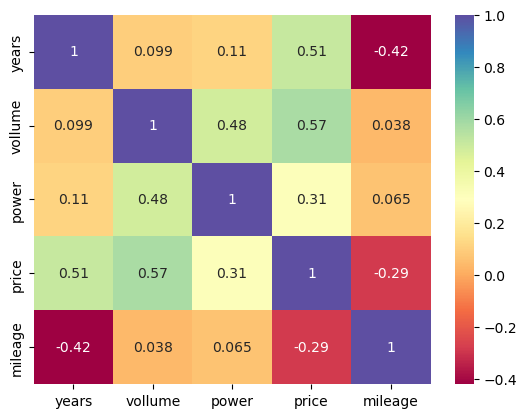

In [97]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="Spectral", annot=True)

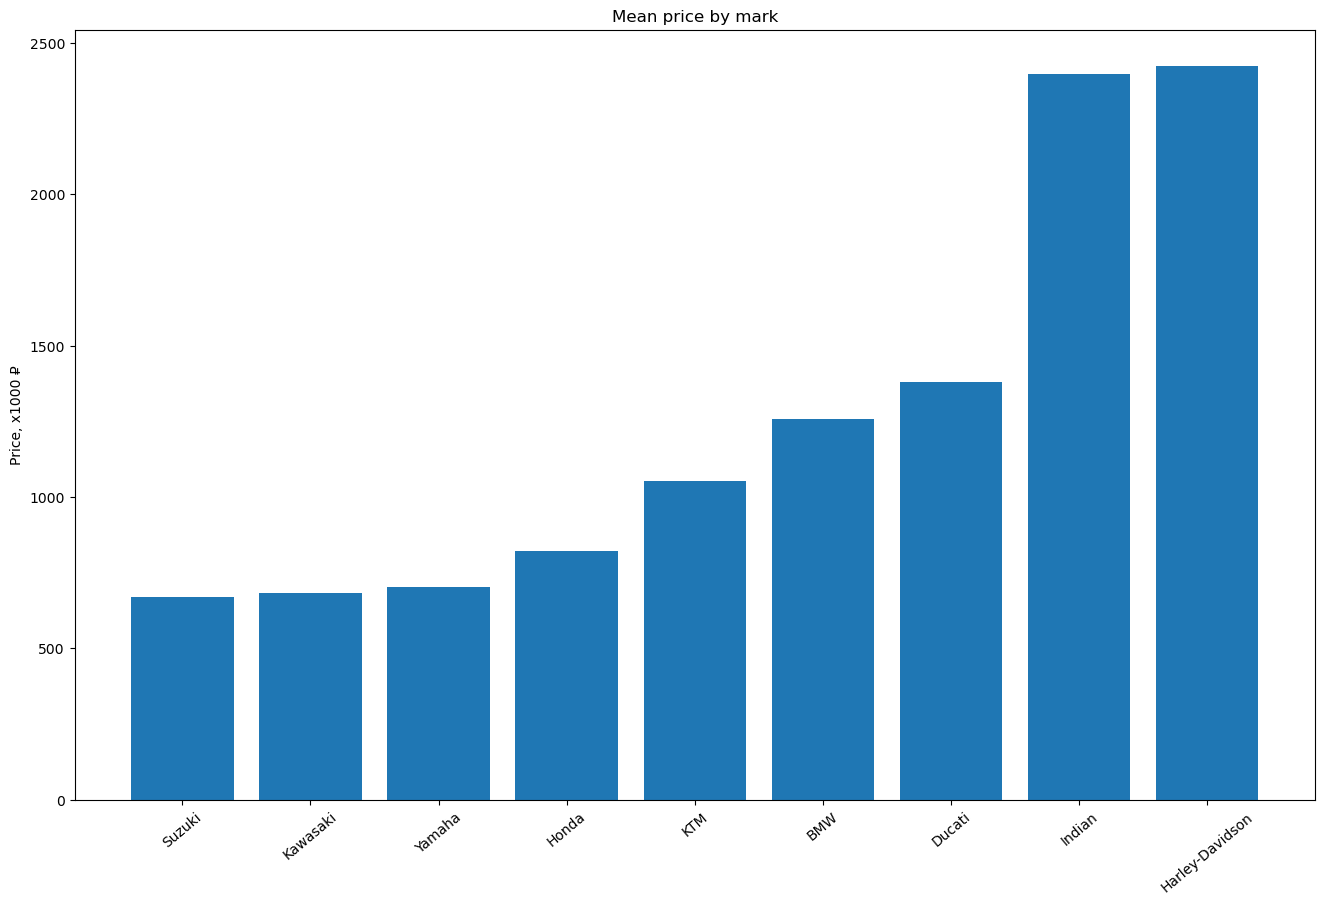

In [104]:
from matplotlib import pyplot as plt

main_category = df.groupby('mark')['price'].mean()//1000
main_category = main_category.sort_values()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.title('Mean price by mark')
plt.bar(main_category.index, main_category)
plt.xticks(rotation=40)
plt.ylabel('Price, x1000 ₽')
plt.show()

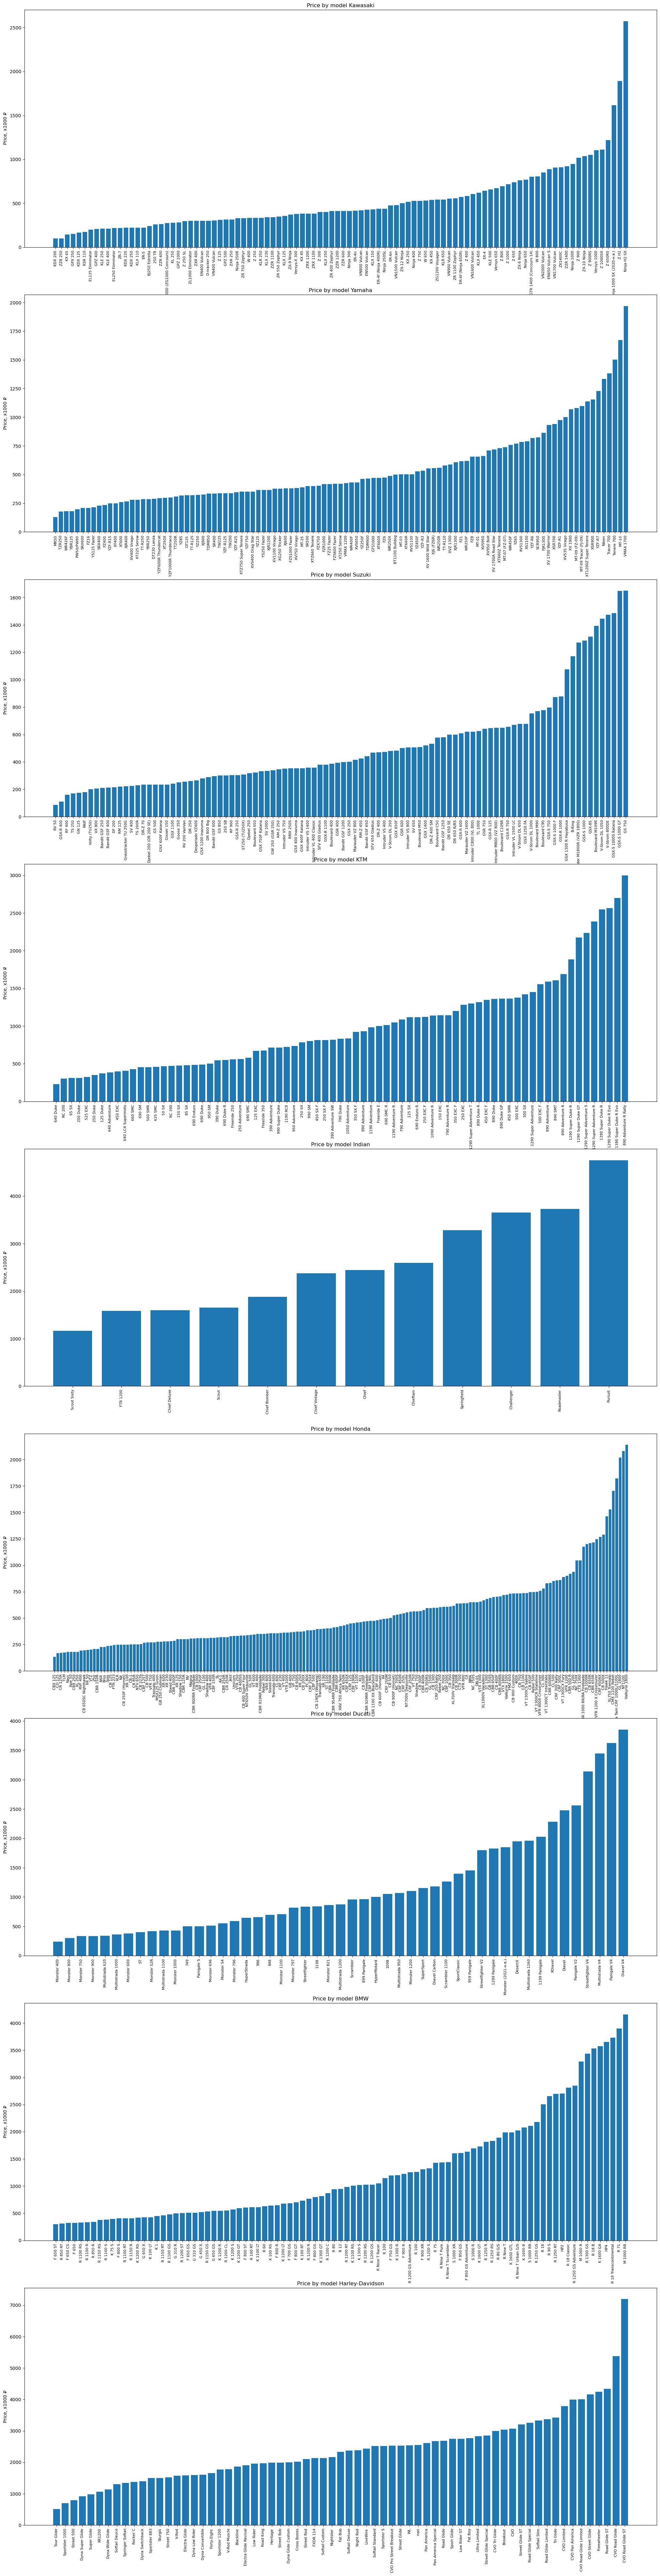

In [127]:
marks = df.mark.unique()

fig, ax = plt.subplots(9, figsize=(25,100))


ax = ax.ravel()

for i, col in enumerate(marks):
    model_price = df[df['mark']==col].groupby('model')['price'].mean()//1000
    model_price = model_price.sort_values()
    ax[i].set_title('Price by model ' + col)
    ax[i].bar(model_price.index, model_price)
    ax[i].set_xticklabels(model_price.index, rotation=90, fontsize=8)
    ax[i].set_ylabel('Price, x1000 ₽')
fig.show()

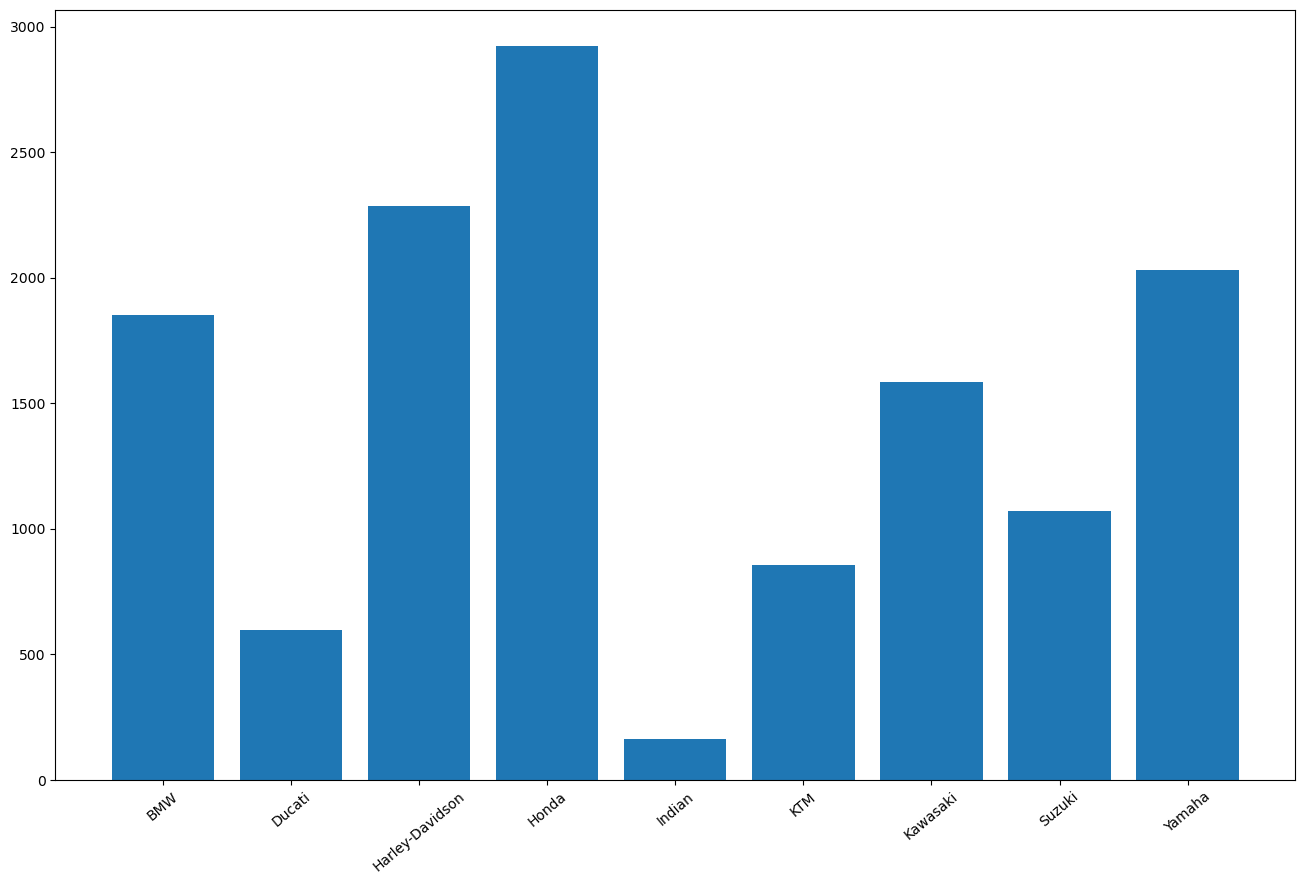

In [105]:
### Проверим количество наблюдений в нашей выборке
main_category_count = df.groupby('mark')['price'].count()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(main_category_count.index, main_category_count)
plt.xticks(rotation=40)

plt.show()

In [128]:
df['age'] = 2024-df['years'] # создадим доп параметр "возраст"
df['expluation'] = df['mileage'] / df['years'] # средний пробег в год

In [129]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from catboost import Pool
from sklearn.preprocessing import StandardScaler

In [144]:
RANDOM_STATE = 111

X = df.drop(['price', 'years'], axis=1)
y = df['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
num_cols = X.loc[:, X.dtypes!=np.object].columns
scaler = StandardScaler()
Xtrain[num_cols] = scaler.fit_transform(Xtrain[num_cols])
Xtest[num_cols] = scaler.transform(Xtest[num_cols])

In [176]:
from joblib import dump, load
dump(scaler, 'moto_scaler.bin', compress=True)

# scaler=load('moto_scaler.bin')

['moto_scaler.bin']

In [177]:
import pickle
with open('moto_scaler.pkl','wb') as f:
    pickle.dump(scaler, f)
# with open('moto_scaler.pkl','rb') as f:
#     scaler = pickle.load(f)

In [138]:
train_pool = Pool(Xtrain, 
                  ytrain,
                  cat_features=list(cat_features))
test_pool = Pool(Xtest, 
                  ytest,
                  cat_features=list(cat_features))

In [158]:
# baseline
cat1 = CatBoostRegressor(custom_metric= ['RMSE'], verbose=0)
cat1.fit(train_pool, eval_set=test_pool, verbose=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.073116
0:	learn: 1091641.8216179	test: 1074383.9873076	best: 1074383.9873076 (0)	total: 19.4ms	remaining: 19.4s
10:	learn: 683603.7987468	test: 668488.0133433	best: 668488.0133433 (10)	total: 225ms	remaining: 20.2s
20:	learn: 512491.1952740	test: 508760.9163733	best: 508760.9163733 (20)	total: 451ms	remaining: 21s
30:	learn: 445004.4341793	test: 450082.9351562	best: 450082.9351562 (30)	total: 668ms	remaining: 20.9s
40:	learn: 416062.4817796	test: 425778.9029646	best: 425778.9029646 (40)	total: 890ms	remaining: 20.8s
50:	learn: 403354.1011161	test: 416681.5051182	best: 416681.5051182 (50)	total: 1.21s	remaining: 22.5s
60:	learn: 396131.8933663	test: 412677.2578392	best: 412677.2578392 (60)	total: 1.46s	remaining: 22.4s
70:	learn: 390811.5096024	test: 410585.4283615	best: 410548.6458836 (68)	total: 1.66s	remaining: 21.8s
80:	learn: 386846.4588619	test: 408366.5628511	best: 408365.9118450 (79)	total: 1.86s	remaining: 21.1s
90:	learn: 382648.0420812	test: 407179.2448

790:	learn: 262182.7452194	test: 388403.0186491	best: 386983.2111039 (530)	total: 18.3s	remaining: 4.83s
800:	learn: 261347.1072980	test: 388182.6109380	best: 386983.2111039 (530)	total: 18.5s	remaining: 4.6s
810:	learn: 260697.8807555	test: 388455.3883923	best: 386983.2111039 (530)	total: 18.7s	remaining: 4.36s
820:	learn: 259932.6146502	test: 388863.8316131	best: 386983.2111039 (530)	total: 18.9s	remaining: 4.13s
830:	learn: 259022.9890125	test: 389120.2602414	best: 386983.2111039 (530)	total: 19.1s	remaining: 3.89s
840:	learn: 258336.9873787	test: 388865.0878027	best: 386983.2111039 (530)	total: 19.4s	remaining: 3.66s
850:	learn: 257633.1181898	test: 388798.1566979	best: 386983.2111039 (530)	total: 19.6s	remaining: 3.43s
860:	learn: 256881.2414773	test: 388718.3067904	best: 386983.2111039 (530)	total: 19.8s	remaining: 3.2s
870:	learn: 256022.6020220	test: 388902.9686918	best: 386983.2111039 (530)	total: 20s	remaining: 2.96s
880:	learn: 255370.0642431	test: 388619.6574836	best: 38698

In [148]:
import os
 
cpuCount = os.cpu_count()
print("Number of CPUs in the system:", cpuCount)

Number of CPUs in the system: 12


In [149]:
cat = CatBoostRegressor(verbose=0)

parameters = {'depth': [6,8,10],
            'learning_rate' : [0.01, 0.05, 0.1],
            'iterations': [30, 50, 100]
            }
grid = GridSearchCV(estimator=cat, param_grid = parameters, cv = 2, 
                    scoring='neg_mean_squared_error', n_jobs=cpuCount)
grid.fit(Xtrain, ytrain, cat_features=list(cat_features))

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001466807D250>,
             n_jobs=12,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error')

In [150]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -151454719209.3365

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [152]:
cat2 = CatBoostRegressor(**grid.best_params_, verbose=0)
cat2.fit(Xtrain, ytrain, cat_features=list(cat_features))
ypred = cat2.predict(Xtest)
round(mean_squared_error(ytest, ypred, squared=False))

366213

In [157]:
model = CatBoostRegressor(custom_metric= ['RMSE'], **grid.best_params_, verbose=0)
model.fit(train_pool, eval_set=test_pool, verbose=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1066621.4219490	test: 1048529.2292608	best: 1048529.2292608 (0)	total: 45.5ms	remaining: 4.5s
10:	learn: 568591.1387962	test: 554951.2381994	best: 554951.2381994 (10)	total: 481ms	remaining: 3.89s
20:	learn: 421684.4556960	test: 421416.1394059	best: 421416.1394059 (20)	total: 977ms	remaining: 3.68s
30:	learn: 379751.7521148	test: 388239.2220557	best: 388239.2220557 (30)	total: 1.44s	remaining: 3.2s
40:	learn: 361328.5721616	test: 378384.2240453	best: 378384.2240453 (40)	total: 1.91s	remaining: 2.75s
50:	learn: 349378.1146192	test: 373807.2119873	best: 373807.2119873 (50)	total: 2.35s	remaining: 2.25s
60:	learn: 341622.3038581	test: 371087.8809798	best: 371087.8809798 (60)	total: 2.77s	remaining: 1.77s
70:	learn: 337169.9532653	test: 369982.8131919	best: 369982.8131919 (70)	total: 3.1s	remaining: 1.27s
80:	learn: 331116.2492138	test: 369019.8331832	best: 369019.8331832 (80)	total: 3.55s	remaining: 832ms
90:	learn: 324981.9647042	test: 367250.8154081	best: 367250.8154081 (90)	t

In [159]:
import optuna

X_train, X_eval, y_train, y_eval = train_test_split(Xtrain, ytrain, 
                                                     test_size=0.25, random_state=RANDOM_STATE)
EARLY_STOPPING_ROUND = 100
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 100
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_STATE
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train, y_train,
                  eval_set=[(X_eval, y_eval)],
                  early_stopping_rounds=EARLY_STOPPING_ROUND,
                  cat_features=list(cat_features))
    loss = mean_squared_error(ytest, regressor.predict(Xtest))
    return loss

In [160]:
study = optuna.create_study(direction = "minimize", study_name=f'catboost-seed{RANDOM_STATE}')
study.optimize(objective, n_trials=100, n_jobs=cpuCount, timeout=24000)

[I 2024-03-30 11:41:06,650] A new study created in memory with name: catboost-seed111
[I 2024-03-30 11:46:20,317] Trial 10 finished with value: 134621305413.29195 and parameters: {'learning_rate': 0.016, 'depth': 11, 'l2_leaf_reg': 3.5, 'min_child_samples': 32}. Best is trial 10 with value: 134621305413.29195.
[I 2024-03-30 11:47:04,186] Trial 4 finished with value: 138819142149.59418 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 9, 'l2_leaf_reg': 3.0, 'min_child_samples': 32}. Best is trial 10 with value: 134621305413.29195.
[I 2024-03-30 11:47:37,702] Trial 0 finished with value: 132728949496.23611 and parameters: {'learning_rate': 0.015, 'depth': 15, 'l2_leaf_reg': 5.5, 'min_child_samples': 16}. Best is trial 0 with value: 132728949496.23611.
[I 2024-03-30 11:51:16,830] Trial 6 finished with value: 131881473723.38994 and parameters: {'learning_rate': 0.008, 'depth': 13, 'l2_leaf_reg': 5.5, 'min_child_samples': 8}. Best is trial 6 with value: 131881473723.38994.
[I

In [161]:
print(study.best_value)
print(study.best_params)

129986606807.63806
{'learning_rate': 0.02, 'depth': 14, 'l2_leaf_reg': 1.5, 'min_child_samples': 1}


In [163]:
model_best = CatBoostRegressor(custom_metric= ['RMSE'], **study.best_params, verbose=0)
model_best.fit(train_pool, eval_set=test_pool, verbose=1, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1137755.6959632	test: 1120659.1727384	best: 1120659.1727384 (0)	total: 436ms	remaining: 7m 15s
1:	learn: 1119467.9351968	test: 1102457.8182037	best: 1102457.8182037 (1)	total: 884ms	remaining: 7m 21s
2:	learn: 1101492.0546208	test: 1084819.0309088	best: 1084819.0309088 (2)	total: 1.38s	remaining: 7m 39s
3:	learn: 1084013.3803386	test: 1067259.6161197	best: 1067259.6161197 (3)	total: 1.83s	remaining: 7m 36s
4:	learn: 1066876.8024456	test: 1050272.1599340	best: 1050272.1599340 (4)	total: 2.23s	remaining: 7m 24s
5:	learn: 1050098.9965327	test: 1033111.7907844	best: 1033111.7907844 (5)	total: 2.7s	remaining: 7m 26s
6:	learn: 1034374.6999460	test: 1017205.8804357	best: 1017205.8804357 (6)	total: 2.75s	remaining: 6m 29s
7:	learn: 1018064.9701738	test: 1000960.2354178	best: 1000960.2354178 (7)	total: 3.18s	remaining: 6m 34s
8:	learn: 1002346.2758740	test: 985089.0642145	best: 985089.0642145 (8)	total: 3.29s	remaining: 6m 2s
9:	learn: 986770.8451888	test: 969508.9724405	best: 969508.

80:	learn: 450940.7554234	test: 452724.7041643	best: 452724.7041643 (80)	total: 32.3s	remaining: 6m 6s
81:	learn: 447933.6570523	test: 450190.2170184	best: 450190.2170184 (81)	total: 32.8s	remaining: 6m 6s
82:	learn: 445060.8859207	test: 447583.0757645	best: 447583.0757645 (82)	total: 33.2s	remaining: 6m 6s
83:	learn: 442158.3782998	test: 445216.9876421	best: 445216.9876421 (83)	total: 33.6s	remaining: 6m 6s
84:	learn: 439349.8357663	test: 442809.8776100	best: 442809.8776100 (84)	total: 34s	remaining: 6m 6s
85:	learn: 436705.2596756	test: 440561.0102215	best: 440561.0102215 (85)	total: 34.5s	remaining: 6m 6s
86:	learn: 434134.6733997	test: 438373.6762347	best: 438373.6762347 (86)	total: 34.9s	remaining: 6m 5s
87:	learn: 431764.6490648	test: 436329.1457834	best: 436329.1457834 (87)	total: 35.3s	remaining: 6m 6s
88:	learn: 429612.8598553	test: 434496.3974005	best: 434496.3974005 (88)	total: 35.8s	remaining: 6m 6s
89:	learn: 427408.3339456	test: 432580.3545929	best: 432580.3545929 (89)	to

159:	learn: 344022.9940701	test: 374311.3392147	best: 374311.3392147 (159)	total: 1m 5s	remaining: 5m 43s
160:	learn: 343256.5406819	test: 373928.1332497	best: 373928.1332497 (160)	total: 1m 5s	remaining: 5m 42s
161:	learn: 342546.6583537	test: 373674.8088249	best: 373674.8088249 (161)	total: 1m 6s	remaining: 5m 42s
162:	learn: 341876.0410434	test: 373378.8391337	best: 373378.8391337 (162)	total: 1m 6s	remaining: 5m 42s
163:	learn: 341319.4469148	test: 373006.2492228	best: 373006.2492228 (163)	total: 1m 7s	remaining: 5m 41s
164:	learn: 340603.8841902	test: 372853.6129250	best: 372853.6129250 (164)	total: 1m 7s	remaining: 5m 41s
165:	learn: 340090.7760322	test: 372484.5576229	best: 372484.5576229 (165)	total: 1m 7s	remaining: 5m 41s
166:	learn: 339476.8337122	test: 372248.9014347	best: 372248.9014347 (166)	total: 1m 8s	remaining: 5m 40s
167:	learn: 338677.4866418	test: 371863.8994109	best: 371863.8994109 (167)	total: 1m 8s	remaining: 5m 40s
168:	learn: 337919.1391255	test: 371630.960254

236:	learn: 306379.4813286	test: 362247.9283400	best: 362233.2306226 (234)	total: 1m 39s	remaining: 5m 21s
237:	learn: 306014.2087198	test: 362184.7945163	best: 362184.7945163 (237)	total: 1m 40s	remaining: 5m 21s
238:	learn: 305644.4028079	test: 362153.2693379	best: 362153.2693379 (238)	total: 1m 41s	remaining: 5m 21s
239:	learn: 305326.8998238	test: 362088.0221316	best: 362088.0221316 (239)	total: 1m 41s	remaining: 5m 21s
240:	learn: 305167.6127390	test: 362064.3061036	best: 362064.3061036 (240)	total: 1m 42s	remaining: 5m 21s
241:	learn: 304798.4049940	test: 361969.7715844	best: 361969.7715844 (241)	total: 1m 42s	remaining: 5m 21s
242:	learn: 304339.2697280	test: 361934.8637741	best: 361934.8637741 (242)	total: 1m 42s	remaining: 5m 20s
243:	learn: 303896.2846490	test: 361954.7681393	best: 361934.8637741 (242)	total: 1m 43s	remaining: 5m 20s
244:	learn: 303584.1974565	test: 361857.8145900	best: 361857.8145900 (244)	total: 1m 44s	remaining: 5m 20s
245:	learn: 303406.3205496	test: 3618

314:	learn: 278343.3703276	test: 356922.4759198	best: 356922.4759198 (314)	total: 2m 16s	remaining: 4m 56s
315:	learn: 277920.9165238	test: 356906.7953576	best: 356906.7953576 (315)	total: 2m 16s	remaining: 4m 56s
316:	learn: 277610.6571573	test: 356769.9243265	best: 356769.9243265 (316)	total: 2m 17s	remaining: 4m 56s
317:	learn: 277318.6763690	test: 356680.8857460	best: 356680.8857460 (317)	total: 2m 18s	remaining: 4m 56s
318:	learn: 276820.6776582	test: 356800.7967497	best: 356680.8857460 (317)	total: 2m 18s	remaining: 4m 55s
319:	learn: 276660.6445983	test: 356782.5567250	best: 356680.8857460 (317)	total: 2m 19s	remaining: 4m 55s
320:	learn: 276657.9304993	test: 356782.6705893	best: 356680.8857460 (317)	total: 2m 19s	remaining: 4m 54s
321:	learn: 276596.2166073	test: 356748.6856165	best: 356680.8857460 (317)	total: 2m 19s	remaining: 4m 52s
322:	learn: 276218.8521246	test: 356593.3085689	best: 356593.3085689 (322)	total: 2m 19s	remaining: 4m 52s
323:	learn: 276066.4490415	test: 3566

391:	learn: 261271.3583203	test: 355866.3187340	best: 355866.3187340 (391)	total: 2m 49s	remaining: 4m 22s
392:	learn: 261269.9038803	test: 355866.3807534	best: 355866.3187340 (391)	total: 2m 49s	remaining: 4m 21s
393:	learn: 261074.8536853	test: 355874.7249048	best: 355866.3187340 (391)	total: 2m 49s	remaining: 4m 20s
394:	learn: 260928.1009251	test: 355813.5720294	best: 355813.5720294 (394)	total: 2m 50s	remaining: 4m 20s
395:	learn: 260661.5657621	test: 355709.8486783	best: 355709.8486783 (395)	total: 2m 50s	remaining: 4m 19s
396:	learn: 260280.6141099	test: 355736.4552024	best: 355709.8486783 (395)	total: 2m 50s	remaining: 4m 19s
397:	learn: 259841.4429377	test: 355728.8541093	best: 355709.8486783 (395)	total: 2m 51s	remaining: 4m 19s
398:	learn: 259691.2685926	test: 355679.4080536	best: 355679.4080536 (398)	total: 2m 51s	remaining: 4m 18s
399:	learn: 259420.8333981	test: 355742.5690118	best: 355679.4080536 (398)	total: 2m 52s	remaining: 4m 18s
400:	learn: 259115.5432406	test: 3557

469:	learn: 244627.9744039	test: 355752.3527843	best: 355478.9242510 (453)	total: 3m 22s	remaining: 3m 48s
470:	learn: 244522.3364966	test: 355720.9548146	best: 355478.9242510 (453)	total: 3m 22s	remaining: 3m 47s
471:	learn: 244364.6469953	test: 355687.6102000	best: 355478.9242510 (453)	total: 3m 23s	remaining: 3m 47s
472:	learn: 244097.5367482	test: 355665.6959866	best: 355478.9242510 (453)	total: 3m 23s	remaining: 3m 47s
473:	learn: 243989.0900679	test: 355653.3616940	best: 355478.9242510 (453)	total: 3m 24s	remaining: 3m 46s
474:	learn: 243711.0210166	test: 355681.2871334	best: 355478.9242510 (453)	total: 3m 24s	remaining: 3m 46s
475:	learn: 243486.0538915	test: 355676.1551189	best: 355478.9242510 (453)	total: 3m 25s	remaining: 3m 46s
476:	learn: 243313.0491835	test: 355638.0484255	best: 355478.9242510 (453)	total: 3m 25s	remaining: 3m 45s
477:	learn: 242991.0013654	test: 355689.6615964	best: 355478.9242510 (453)	total: 3m 26s	remaining: 3m 45s
478:	learn: 242718.9650426	test: 3557

546:	learn: 229776.9257033	test: 355636.9184000	best: 355478.9242510 (453)	total: 3m 56s	remaining: 3m 15s
547:	learn: 229583.3210750	test: 355695.8240205	best: 355478.9242510 (453)	total: 3m 57s	remaining: 3m 15s
548:	learn: 229396.7668858	test: 355686.0177469	best: 355478.9242510 (453)	total: 3m 57s	remaining: 3m 15s
549:	learn: 229283.0823865	test: 355658.2205076	best: 355478.9242510 (453)	total: 3m 58s	remaining: 3m 14s
550:	learn: 229094.4105451	test: 355732.6679143	best: 355478.9242510 (453)	total: 3m 58s	remaining: 3m 14s
551:	learn: 228891.8930733	test: 355641.0113262	best: 355478.9242510 (453)	total: 3m 58s	remaining: 3m 13s
552:	learn: 228812.6708486	test: 355643.7981121	best: 355478.9242510 (453)	total: 3m 59s	remaining: 3m 13s
553:	learn: 228562.0168896	test: 355723.0080053	best: 355478.9242510 (453)	total: 3m 59s	remaining: 3m 13s
554:	learn: 228430.6460675	test: 355701.2852305	best: 355478.9242510 (453)	total: 4m	remaining: 3m 12s
555:	learn: 228303.0972984	test: 355679.6

624:	learn: 217404.6452600	test: 356055.5195926	best: 355478.9242510 (453)	total: 4m 34s	remaining: 2m 44s
625:	learn: 217225.7724884	test: 356099.0856975	best: 355478.9242510 (453)	total: 4m 34s	remaining: 2m 44s
626:	learn: 217145.4724580	test: 356144.0565819	best: 355478.9242510 (453)	total: 4m 35s	remaining: 2m 43s
627:	learn: 216941.5869895	test: 356165.5113684	best: 355478.9242510 (453)	total: 4m 35s	remaining: 2m 43s
628:	learn: 216794.9107535	test: 356144.8386026	best: 355478.9242510 (453)	total: 4m 36s	remaining: 2m 43s
629:	learn: 216595.7140683	test: 356229.7950455	best: 355478.9242510 (453)	total: 4m 36s	remaining: 2m 42s
630:	learn: 216421.5491546	test: 356257.2739164	best: 355478.9242510 (453)	total: 4m 37s	remaining: 2m 42s
631:	learn: 216219.6975245	test: 356314.0705564	best: 355478.9242510 (453)	total: 4m 37s	remaining: 2m 41s
632:	learn: 216115.5863055	test: 356348.6200114	best: 355478.9242510 (453)	total: 4m 38s	remaining: 2m 41s
633:	learn: 216000.8628779	test: 3563

701:	learn: 206662.9544590	test: 357078.5537015	best: 355478.9242510 (453)	total: 5m 12s	remaining: 2m 12s
702:	learn: 206561.6422257	test: 357108.7212454	best: 355478.9242510 (453)	total: 5m 12s	remaining: 2m 12s
703:	learn: 206346.4967541	test: 357180.3524249	best: 355478.9242510 (453)	total: 5m 13s	remaining: 2m 11s
704:	learn: 206255.6283901	test: 357157.0581926	best: 355478.9242510 (453)	total: 5m 13s	remaining: 2m 11s
705:	learn: 206139.0894583	test: 357156.7953408	best: 355478.9242510 (453)	total: 5m 14s	remaining: 2m 10s
706:	learn: 206070.9517735	test: 357142.7461379	best: 355478.9242510 (453)	total: 5m 14s	remaining: 2m 10s
707:	learn: 205990.5640781	test: 357186.2149781	best: 355478.9242510 (453)	total: 5m 15s	remaining: 2m 10s
708:	learn: 205735.4456431	test: 357213.2183257	best: 355478.9242510 (453)	total: 5m 15s	remaining: 2m 9s
709:	learn: 205516.2958892	test: 357234.9383428	best: 355478.9242510 (453)	total: 5m 16s	remaining: 2m 9s
710:	learn: 205331.4043395	test: 357273

778:	learn: 196697.1321698	test: 358051.0449593	best: 355478.9242510 (453)	total: 5m 51s	remaining: 1m 39s
779:	learn: 196579.6089660	test: 358108.9116354	best: 355478.9242510 (453)	total: 5m 52s	remaining: 1m 39s
780:	learn: 196507.0795633	test: 358098.1275077	best: 355478.9242510 (453)	total: 5m 52s	remaining: 1m 38s
781:	learn: 196452.4376760	test: 358070.8147524	best: 355478.9242510 (453)	total: 5m 53s	remaining: 1m 38s
782:	learn: 196342.2684611	test: 358046.3820021	best: 355478.9242510 (453)	total: 5m 53s	remaining: 1m 38s
783:	learn: 196266.8428399	test: 358027.2558571	best: 355478.9242510 (453)	total: 5m 54s	remaining: 1m 37s
784:	learn: 196240.8835662	test: 358026.0603972	best: 355478.9242510 (453)	total: 5m 54s	remaining: 1m 37s
785:	learn: 196061.2621173	test: 357996.3728201	best: 355478.9242510 (453)	total: 5m 55s	remaining: 1m 36s
786:	learn: 195833.4402817	test: 358070.4111908	best: 355478.9242510 (453)	total: 5m 55s	remaining: 1m 36s
787:	learn: 195705.4755184	test: 3580

855:	learn: 187681.8577291	test: 359041.5781476	best: 355478.9242510 (453)	total: 6m 30s	remaining: 1m 5s
856:	learn: 187573.2596490	test: 359085.1426008	best: 355478.9242510 (453)	total: 6m 30s	remaining: 1m 5s
857:	learn: 187441.5441948	test: 359175.5366835	best: 355478.9242510 (453)	total: 6m 31s	remaining: 1m 4s
858:	learn: 187348.1215575	test: 359234.1956931	best: 355478.9242510 (453)	total: 6m 31s	remaining: 1m 4s
859:	learn: 187128.9698938	test: 359291.9161685	best: 355478.9242510 (453)	total: 6m 32s	remaining: 1m 3s
860:	learn: 186992.3083062	test: 359298.7782112	best: 355478.9242510 (453)	total: 6m 32s	remaining: 1m 3s
861:	learn: 186943.1132412	test: 359289.0019857	best: 355478.9242510 (453)	total: 6m 33s	remaining: 1m 2s
862:	learn: 186813.8827246	test: 359328.7156157	best: 355478.9242510 (453)	total: 6m 33s	remaining: 1m 2s
863:	learn: 186744.6487128	test: 359318.7037014	best: 355478.9242510 (453)	total: 6m 34s	remaining: 1m 2s
864:	learn: 186675.9758831	test: 359324.254567

933:	learn: 178258.6208000	test: 360290.6915846	best: 355478.9242510 (453)	total: 7m 8s	remaining: 30.3s
934:	learn: 178178.1555542	test: 360322.5131879	best: 355478.9242510 (453)	total: 7m 9s	remaining: 29.8s
935:	learn: 177991.6955093	test: 360324.0894482	best: 355478.9242510 (453)	total: 7m 9s	remaining: 29.4s
936:	learn: 177762.7915069	test: 360339.9091751	best: 355478.9242510 (453)	total: 7m 10s	remaining: 28.9s
937:	learn: 177664.8325320	test: 360337.7799753	best: 355478.9242510 (453)	total: 7m 10s	remaining: 28.5s
938:	learn: 177504.3024319	test: 360399.3540922	best: 355478.9242510 (453)	total: 7m 11s	remaining: 28s
939:	learn: 177401.7114812	test: 360377.5838990	best: 355478.9242510 (453)	total: 7m 11s	remaining: 27.6s
940:	learn: 177257.0131305	test: 360364.1949759	best: 355478.9242510 (453)	total: 7m 12s	remaining: 27.1s
941:	learn: 177110.7112273	test: 360392.3313491	best: 355478.9242510 (453)	total: 7m 12s	remaining: 26.6s
942:	learn: 176952.0152344	test: 360403.8971637	bes

In [168]:
model_best.save_model("motomodel.cbm")

In [173]:
importances = model_best.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()
feature_importances

model          6.516462
mileage        6.572170
expluation     8.666879
mark          14.040477
power         16.610517
age           17.499767
vollume       30.093728
dtype: float64

Text(0, 0.5, 'Features')

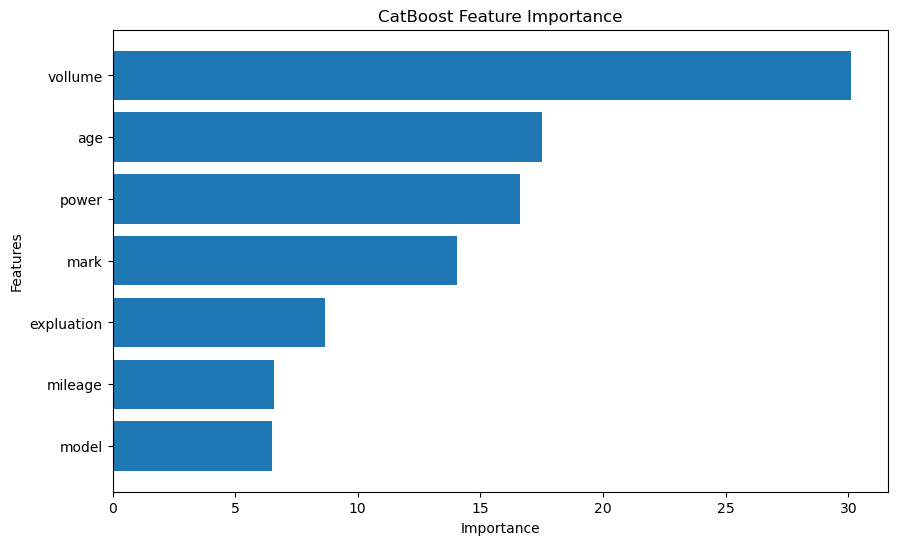

In [174]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')